In [1]:
###############################################################################################
#
# exécutez cette cellule avant d'utiliser le reste du notebook
#
# supprimez-là si vous exécutez ce notebook en-dehors de la distribution CHIM2-ON1 #
#
###############################################################################################

import os
import sys

cwd0 = "./config/"
sys.path.append(cwd0)
                            
import visualID as vID
from visualID import color
vID.init(cwd0)

**Début à:** Tuesday 22 November 2022, 16:41:41  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

# Les intégrales

## Prérequis

- Introduction à Python. 
- Les variables.
- Les listes.
- Les tableaux.
- Les fonctions.

## Compétences 

1. Calculer l'intégrale d'une fonction donnée en des points discrets.  
2. Calculer l'intégrale d'une fonction dont on connait l'expression. 

## Objectifs 

1. Acquérir les compétences ci-dessus.

## Contenu de la vidéo 

### Introduction 

L'intégrale d'une fonction $f$ entre deux bornes $a$ et $b$ est notée
$$I = \int_a^b f(x)dx$$

Grâce au module `scipy.integrate` de Python, il est possible de calculer des intégrales de manière approchée. Si vous voulez calculer une intégrale, vous allez vous retrouver dans un des 2 cas suivants : 
- (1) Vous connaissez l'écriture analytique de la fonction. Par exemple, la capacité calorifique d'un fluide modélisée par $C_p(T)=A+BT+CT^2+DT^3+E/T^2$ avec des constantes A, B, C, D, E connues. 
- (2) Vous ne savez pas comment s'écrit la fonction. Vous connaissez juste sa valeur pour certains points $x$ donnés. C'est le cas quand la fonction est le résultat d'une mesure expérimentale. Par exemple, lors d'une analyse par chromatographie vous avez un tableau de valeurs mesurées $f(t)$ en fonction d'un tableau de temps $t$ et vous voulez l'aire sous les pics (c'est-à-dire l'intégrale de $f$). 

Dans chacun de ces cas, il faudra utiliser des méthodes différentes du module `scipy.integrate`.


### Intégration d'une fonction dont on connait l'expression. 

Prenons l'exemple de la fonction $f(x)=4\sqrt{1-x^2}$, qu'on voudrait intégrer entre $0$ et $1$. Le résultat peut être calculé de manière théorique et est $I=\pi$ mais faisons comme si on ne le savait pas.

Le calcul de l'intégrale se fait en 3 temps :
1. Charger la méthode `quad` du module `scipy.integrate`.
2. Définir la fonction Python qui va représenter la fonction mathématique qu'on veut intégrer. 
3. Appeler la méthode `quad`. 

Voici un exemple ci-dessous. 

In [3]:
from pylab import *                 # Chargement de l'environnement scientifique
from scipy.integrate import quad    # 1. Chargement de la methode quad 

def f(x):                           # 2. Definition de la fonction Python
  return 4*sqrt(1-x**2) 

I, err = quad( f, a=0, b=1)         # 3. Appel de la fonction quad, en spécifiant la fonction en premier, 
                                    #    puis les bornes d'integration a et b
                                    # La fonction quad a 2 sorties par défaut : la valeur de l'intégrale, 
                                    # et une estimation de l'erreur. 

print("Le resultat est                      : ", I)
print("L'etimation de l'erreur par quad est : ", err)
print("L'erreur est en realite              : ", abs(pi-I))

Le resultat est                      :  3.1415926535897922
L'etimation de l'erreur par quad est :  3.533564552071766e-10
L'erreur est en realite              :  8.881784197001252e-16


La fonction `quad` a 2 sorties, la valeur approchée de l'intégrale et une estimation de l'erreur qui vient de la méthode numérique utilisée. 

Gardez en tête que cette fonction `quad` **ne fait pas** une résolution analytique. Le résultat sera toujours une approximation de la réalité. Pour avoir une idée de l'erreur commise, il faut regarder la valeur de la deuxième sortie. Ici, l'erreur est estimée à $3.53\,10^{-10}$ par `quad`. Comme nous savons que le résultat est $\pi$, nous pouvons aussi calculer l'erreur nous même et nous voyons que cette erreur est en réalité encore plus petite.   

NB : dans la méthode `quad`, on donne le nom de la fonction `f` et pas l'expression `f(x)`. Comment faire dans le cas où la fonction `f` a d'autres arguments ? Voyez sur l'exemple ci-dessous qui calcule la variation de chaleur  due au passage de 300K à 900K de 1kg de matériau de capacité calorifique $c_p$ : $Q = \int_{300}^{900} c_p(T) dT$. Dans cette exemple, la fonction est $c_p$, son argument pour l'intégration est $T$ (notez l'intégrale avec $dT$) et les autres variables A, B, C, D, E sont des paramètres (des constantes). 



In [4]:
from pylab import *                       # Chargement de l'environnement scientifique
from scipy.integrate import quad          # 1. Chargement de la methode quad 

A = 1075.51
B = 75.237
C = -69.81
D = 327.53
E = 0.015486

def cp(T, A, B, C, D, E):   
  t = T/1000                              # 2. Definition de la fonction Python
  return A + B*t + C*t**2 + D*t**3 + E/t 

Q, err = quad( cp, a=300, b=900, args=(A, B, C, D, E))  # 3. Appel de la fonction quad, en spécifiant la fonction 
                                                        #    en premier, puis les bornes d'integration a et b, 
                                                        #    puis les parametres constants

print("Le resultat est                      : ", Q, "Joules")
print("L'etimation de l'erreur par quad est : ", err)

Le resultat est                      :  709132.6531099023 Joules
L'etimation de l'erreur par quad est :  7.872953989961376e-09


Lorsqu'il y a une variable d'intégration (ici $T$) et des paramètres (ici A, B, C, D, E), il faut veiller à 2 choses : 
1. placer la variable d'intégration en premier agrument de la fonction dans la définition `def cp(T,...)` 
2. rajouter `args=(les,parametres,separes,par,des,virgules)` dans l'appel à `quad`  




### Intégration d'une fonction dont on ne connait que des valeurs discretes.  

Lorsqu'on n'a pas d'expression pour la fonction, mais juste des valeurs en certains points, on ne peut pas utiliser la méthode ci-dessus. On peut par exemple utiliser par exemple la méthode de Simpson. Dans les anciennes versions de `scipy.integrate` , elle s'appelle `simps` et dans les récentes elle s'appelle `simpson`. Si l'une des deux versions ne fonctionne pas, essayez l'autre. (pour connaître votre version de scipy, vous pouvez taper `import scipy; print(scipy.__version__)` )

Dans l'exemple ci-dessous, on dispose de mesures au cours du temps $t$, pour des temps entre 20 et 60 secondes. On dispose aussi de la valeur d'un signal $v$ en unités arbitraires. Il pourrait s'agir d'une courbe de chromatographie par exemple. On veut calculer l'aire sous le pic. 

L'aire sous la courbe est  8.862273343765281


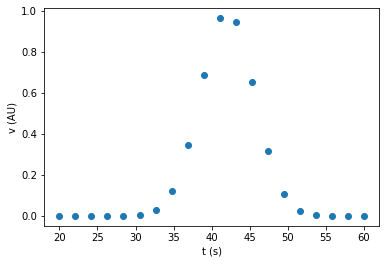

In [8]:
from pylab import *
from scipy.integrate import simps  # chargement de la methode simps 
                                   # (anciennes versions de scipy), a remplacer par simpson 
                                   # pour les nouvelles versions

# donnees experimentales
t = array([20.        , 22.10526316, 24.21052632, 26.31578947, 28.42105263, 30.52631579, 32.63157895, 34.73684211, 36.84210526, 38.94736842, 41.05263158, 43.15789474, 45.26315789, 47.36842105, 49.47368421, 51.57894737, 53.68421053, 55.78947368, 57.89473684, 60.        ])
v = array([3.90893843e-09, 1.33119028e-07, 3.18004580e-06, 5.32891190e-05, 6.26405605e-04, 5.16517046e-03, 2.98762174e-02, 1.21221176e-01, 3.45019230e-01, 6.88842668e-01, 9.64736495e-01, 9.47783850e-01, 6.53163383e-01, 3.15752126e-01, 1.07073665e-01, 2.54701193e-02, 4.25002240e-03, 4.97465983e-04, 4.08458076e-05, 2.35257520e-06])

# Visualisation des donnees 
figure()
plot(t, v, 'o')
xlabel('t (s)')
ylabel('v (AU)')

# Calcul de l'aire sous la courbe 
A = simps( v, x=t)                  # appel de la methode simps

print("L'aire sous la courbe est ", A)

On voit que l'appel est très simple : le premier argument est le tableau des ordonnées (valeurs de la fonction), et le second argument est le tableau des abscisses. Le `x=` n'est pas nécessaire, mais c'est bien de le mettre pour ne pas oublier l'ordre des arguments. La méthode `simps` ou `simpson` ne renvoie qu'un résultat : la valeur de l'intégrale.    


### A retenir 

- Si vous pouvez écrire la fonction explicitement, utilisez `scipy.integrate.quad`. 
- Si vous ne disposez que de tableaux de données, utilisez `scipy.integrate.simps` (scipy version <= 1.4) ou `scipy.integrate.simpson` (scipy version >= 1.5).


In [9]:
###############################################################################################
# supprimez cette cellule si vous exécutez ce notebook en-dehors de la distribution CHIM2-ON1 #
###############################################################################################

vID.end(cwd0)

**Fin à:** Tuesday 22 November 2022, 16:45:33  
**Durée:** 00:03:53 605ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>